## Arima 模型运行前的准备工作

ARMA, ARIMA, SARIMA assumptions:

▪ Time-series data is stationary.

▪ If nonstationary, remove trend, seasonality, apply differencing, and so on.

▪ Remember that stationary data has no trend, seasonality, constant mean, and
constant variance.

▪ Therefore, the past is assumed to represent what will happen in the future
in a probabilistic sense.

Stationarity
* Constant mean (no trend)

* Constant variance (no heteroscedacticity)

* Constant autocorrelation structure

* No periodic component (no seasonality)

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
df_ori = pd.read_csv('../Dataset/3bs_8q_4p_dataset_washed.csv',
                parse_dates=['datetime'],
                index_col=0)

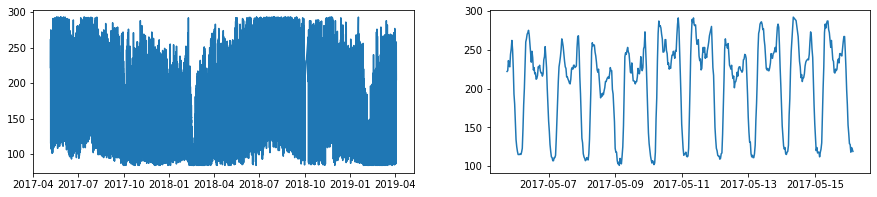

In [25]:
# 我们所研究的列是'q8'
station_for_pred = 'q8'
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(df['datetime'], df[station_for_pred])
plt.subplot(122)
plt.plot(df['datetime'].iloc[:500], df[station_for_pred].iloc[:500])
plt.show()

## 水量数据一定是 nostationary 的

In [24]:
station_for_pred = 'q8'
df = df_ori[[station_for_pred, 'datetime']]
def datetime_month(x):
    return x.month
def datetime_year(x):
    return x.year
df.loc[:,'month'] = df.loc[:,'datetime'].apply(datetime_month)
df.loc[:,'year'] = df.loc[:,'datetime'].apply(datetime_year)

### 趋势性 trend

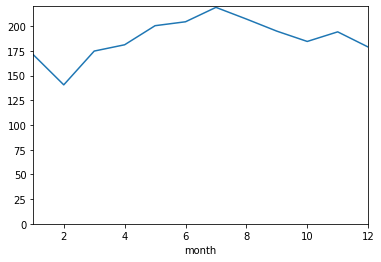

In [26]:
df.groupby(['month']).mean().loc[:, 'q8'].plot()
plt.ylim([0,220])
plt.show()

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
x = df['datetime'].loc[:1000]
y = df[station_for_pred].loc[:1000]

ss_decomposition = seasonal_decompose(x=y, model='additive', freq=48)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

In [62]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.figure(figsize=(15,2), facecolor='w')
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.show()

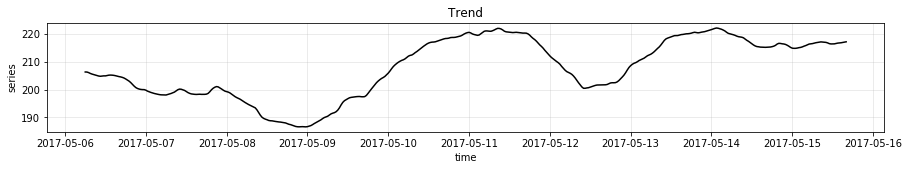

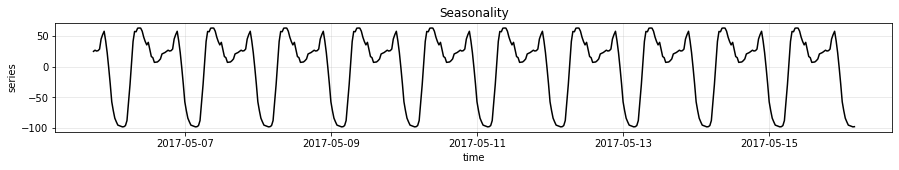

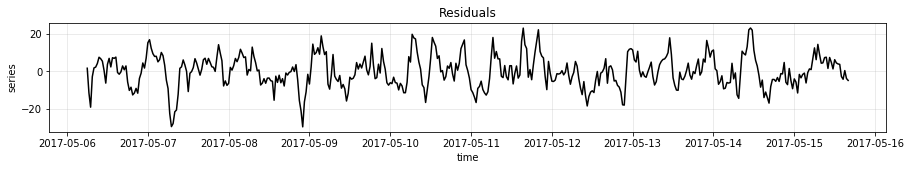

In [63]:
run_sequence_plot(x, est_trend, title="Trend", ylabel="series")
run_sequence_plot(x, est_seasonal, title="Seasonality", ylabel="series")
run_sequence_plot(x, est_residual, title="Residuals", ylabel="series")